# Probabilidad y Estadística para Inteligencia Artificial

- **Alumno:** Agustín Jesús Vazquez (e2301)

In [1]:
# Importamos librerías necesarias para el desarrollo

import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns

## Ejercicio N°1

De 10 monedas hay 1 monedas falsas, que tienen probabilidad 0,8 de mostrar cara al ser lanzadas. Si se toma
una moneda al azar, se lanza 15 veces, y en todas ellas se obtiene cara, ¿qué es más probable, que la moneda elegida sea
justa o que esté cargada? Dar las probabilidades tanto de que la moneda elegida sea falsa, como de que sea justa.

### Resolución N°1

Del problema, se conocen los siguientes datos:

El espacio muestral es: **$\Omega$ = {cara, sello}**. Además, se sabe que de 10 monedas, una es falsa. Entonces, al tomar una moneda al azar, se tienen las siguientes probabilidades de que sea justa o falsa:

In [2]:
# Probabilidad de monedas

mj = 9/10 # Probabilidad de que una moneda tomada al azar sea justa
print(mj)

mf = 1/10 # Probabilidad de que una moneda tomada al azar sea falsa
print(mf)

0.9
0.1


Por otro lado, se sabe que si una moneda es falsa, tiene un 80% de que al lanzarla al aire, el resultado sea cara. En cambio, si la moneda es justa, entonces la probabilidad sería 50% de que sea cara, y otro 50% de que sea sello. Entonces: 

In [3]:
# Moneda falsa

pcf = 0.8 # Probabilidad de que sea "cara" siendo falsa
psf = 0.2 # Probabilidad de que sea "sello" siendo falsa

# Moneda justa

pcj = 0.5 # Probabilidad de que sea "cara" siendo justa
psj = 0.5 # Probabilidad de que sea "sello" siendo justa


También se tiene que la moneda tomada al azar se lanza 15 veces (evento observado), y en todas el resultado fue cara. Esto es: 

In [4]:
pej = (0.5)**15 # Probabilidad del evento observado dado que la moneda es justa

pef = (0.8)**15 # Probabilidad del evento observado dado que la moneda es falsa

Conocidas las probabilidades de nuestro evento (15 lanzadas de moneda) dado que la moneda sea justa o falsa, podemos calcular si es más probable que la moneda lanzada era justa o estaba cargada.

Para realizar el calculo, se utiliza el **Teorema de Bayes**
$$
P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)}
$$
Esto es, la probabilidad condicionada de un evento A (moneda falsa) dado otro evento B (evento observado), es igual a la probabilidad condicionada del evento B (evento observado) dado el evento A (moneda falsa) por la probabilidad del evento A (moneda falsa), entre la probabilidad del evento B (evento observado).

Dado a que en este ejemplo existe más de un evento dado $\Omega$, entonces la formula adopta la siguiente forma:
$$
P(A_i \mid B) \;=\; \frac{P(B \mid A_i)\,P(A_i)}{\sum_{j=1}^{n} P(B \mid A_j)\,P(A_j)}
$$
Entonces:
$$
P(moneda falsa \mid E) \;=\; \frac{P(E \mid moneda falsa)\,P(moneda falsa)}{P(E \mid moneda falsa)\,P(moneda falsa) + P(E \mid moneda justa)\,P(moneda justa)}
$$

In [5]:
num = mf*pef # Probabilidad del "evento observado" dado que la moneda sea "falsa" por la probabilidad de que sea "falsa" 
m1 = mf*pef # Probabilidad del "evento observado" dado que la moneda sea "falsa" por la probabilidad de que sea "falsa"
m2 = mj*pej # Probabilidad del "evento observado" dado que la moneda sea "justa" por la probabilidad de que sea "justa"

# Aplicando el *Teorema de Bayes*

pfe = (num) / (m1 + m2)

print('La probabilidad de que la moneda elegida al azar sea falsa dado el evento E es:', pfe*100, '%')

La probabilidad de que la moneda elegida al azar sea falsa dado el evento E es: 99.22542099751864 %


Conocida la probabilidad de que la moneda elegida al azar es falsa, entonces:

In [6]:
pje = 1 - pfe

print('La probabilidad de que la moneda elegida al azar sea justa dado el evento E es:', pje*100, '%')

La probabilidad de que la moneda elegida al azar sea justa dado el evento E es: 0.774579002481357 %


## Ejercicio N°2

Sean X e Y dos v.a. continuas con densidad conjunta:

$$
f_{X,Y}(x, y) = 
\begin{cases} 
Ky & 49x^2 \leq y \leq x \\
0 & \text{en otro caso}
\end{cases}
$$

Encontrar:

- Determinar el valor de K
- Encuentre la densidad marginal $f_Y(y)$ de Y
- Encuentre la densidad condicional $f_x|_y(x|y)$ de X dado Y

### Resolución N°2

Este ejercicio plantea dos variables aleatorias, **X** e **Y**, cuya densidad conjunta es $f_X,_Y = Ky$ para todo $49x^2 \leq y \leq x$ y 0 en otro caso, es decir, fuera de los limites propuestos. Pero solo son dato los límites de integración respecto a *y*, debemos encontrar los límites de *x*:

$$
y \in [49x^2, \, x].
$$

Para que esto tenga sentido, el intervalo no debe ser vacío

$$
  49x^2 \leq x  \Rightarrow 49x^2 - x \leq 0
$$

Entonces:

$$
  x(49x - 1) \leq 0 \; \text{que se cumple cuando} \; 0 \leq x \leq \frac{1}{49}
$$

Finalmente, la densidad conjunta se define como sigue:

$$
 \iint_{D} f(x,y) \, dx\,dy = \int_{0}^{\frac{1}{49}} \int_{49x^2}^{x} Ky \, dy \, dx
$$



In [7]:
# Graficando los límites de integración

# Definimos rango de x
x = np.linspace(0, 1/20, 400)

# Curvas que delimitan la región
y_inf = 49*x**2 # Límite inferior de y
y_sup = x       # Límite superior de y

x_inf = 0 # Límite inferior de x
x_sup = 1 # Límite superior de x

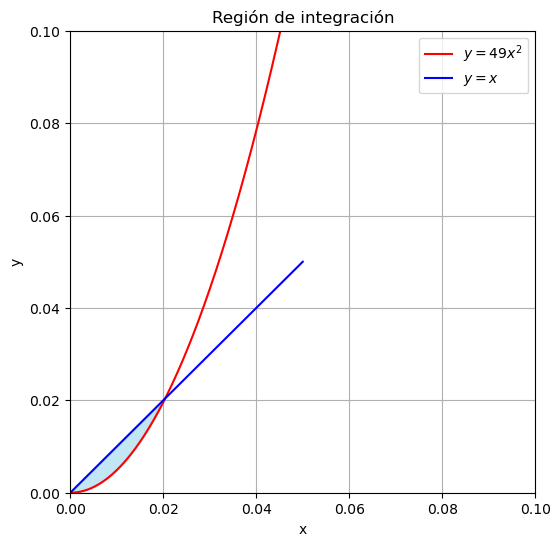

In [8]:
# Gráfico
plt.figure(figsize=(6,6))
plt.plot(x, y_inf, 'r', label=r'$y = 49x^2$')
plt.plot(x, y_sup, 'b', label=r'$y = x$')
#plt.plot(x, x_inf, 'r', label=r'$x = 0$')
#plt.plot(x, x_sup, 'b', label=r'$x = 1$')

# Rellenar la región entre las dos curvas
plt.fill_between(x, y_inf, y_sup, where=(y_sup>=y_inf), color='skyblue', alpha=0.5)

# Ejes y etiquetas
plt.xlim(0,0.1)
plt.ylim(0,0.1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Región de integración")
plt.legend()
plt.grid(True)
plt.show()

#### Valor de K

Para encontrar el valor de **K** se propone resolver la integral doble definida anteriormente, ya que sabemos que al tratarse de una densidad conjunta, entonces:

$$
 \iint_{D} f(x,y) \, dx\,dy = 1
$$

Esto es:

$$
\int_{0}^{\frac{1}{49}} \int_{49x^2}^{x} Ky \, dy \, dx = 1
$$


In [9]:
# Definir variables
x, y, K = sp.symbols('x y K', real=True, positive=True)

# Definir la función a integrar
f = K * y

In [10]:
# Integral interna (respecto de y)
inner_integral = sp.integrate(f, (y, 49*x**2, x))

print('La integral interna resulta: ',inner_integral)

La integral interna resulta:  -2401*K*x**4/2 + K*x**2/2


In [11]:
# Integral externa (respecto de x)
outer_integral = sp.integrate(inner_integral, (x, 0, 1/49))

print('La integral externa resulta: ',outer_integral)

La integral externa resulta:  5.66657316820939e-7*K


In [12]:
# Resolver la ecuación outer_integral = 1 para K
solution = sp.solve(sp.Eq(outer_integral, 1), K)

print('El valor de K es: ',solution[0])

El valor de K es:  1764735.00000000


#### Densidad marginal $f_Y(y)$ de Y

Conocida la densidad conjunta:

$$
f_{X,Y}(x, y) = 
\begin{cases} 
Ky & si \; 0 \leq x \leq \frac{1}{49}, \; 49x^2 \leq y \leq x \\
0 & \text{en otro caso}
\end{cases}
$$

Por definición, la *densidad marginal* de **Y** es:

$$
 f_{Y}(y) = \int_{a(y)}^{b(y)} f(x,y) \, dx
$$

Donde los límites de integración de *x* dependen de *y*.

De las condiciones:

$$
49x^2 \leq x
$$

$$
y \leq x
$$

$$
0 \leq x \leq \frac{1}{49}
$$

Para que exista un *x* compatible, necesitamos:


$$
 49x^2 \leq y \leq x
$$

Si despejamos los posibles valores de *y*:

$$
  De \; y \leq x \; con \; x \leq \frac{1}{49} \Rightarrow y \leq \frac{1}{49}
$$

$$
  De \; y \geq 49x^2 \geq 0 \Rightarrow y \geq 0
$$

Entonces, el rango de *y* es:

$$
0 \leq y \leq \frac{1}{49}
$$

Debemos determinar los límites de *x* para un *y* fijo

$$
  49x^2 \leq y  \Rightarrow x \leq \sqrt{\frac{y}{49}} \\
$$
$$
  y \leq x \\
$$

Entonces:

$$
x \in [y, \, \sqrt{\frac{y}{49}}] \Rightarrow x \in [y, \, \frac{\sqrt{y}}{7}].
$$

#### Expresión marginal de Y

$$
 f_{Y}(y) = \int_{y}^{\frac{\sqrt{y}}{7}} Ky \, dx
$$

In [13]:
# Reutilizando la función definida anteriormente

k = solution[0] # Asigno el resultado anterior a la variable "k"

# Integral en x, de y a sqrt(y)/7
dens_marginal_y = sp.integrate(f.subs(K, k), (x, y, sp.sqrt(y)/7))

print('La densidad marginal de Y es: ',dens_marginal_y)

La densidad marginal de Y es:  252105.0*y**(3/2) - 1764735.0*y**2


Finalmente, se tiene que la densidad marginal $f_Y(y)$ de Y es:

$$
f_{Y}(y) = 
\begin{cases} 
Ky(\frac{\sqrt{y}}{7}-y) & 0 \leq y \leq \frac{1}{49} \\
0 & \text{en otro caso}
\end{cases}
$$

donde **K = 1.764.735**

#### Densidad condicional $f_x|_y(x|y)$ de X dado Y

La densidad condicional se define como:

$$
f_{X|Y}(x|y) = \frac{f_{X,Y}(x,y)}{f_Y(y)}, \quad f_Y(y) > 0.
$$

En nuestro caso:

- La densidad conjunta es:
$$
f_{X,Y}(x,y) = K y, \quad y \leq x \leq \tfrac{\sqrt{y}}{7}, \; 0 \leq y \leq \tfrac{1}{49}.
$$

- La marginal de *Y* es:
$$
f_Y(y) = K y \left( \tfrac{\sqrt{y}}{7} - y \right), \quad 0 \leq y \leq \tfrac{1}{49}.
$$

In [14]:
# Valor de K
K = k

# Función conjunta
f_xy = K * y

# Marginal de Y (ya encontrada)
f_y = K*y*(sp.sqrt(y)/7 - y)

# Densidad condicional f_{X|Y}(x|y)
f_x_dado_y = sp.simplify(f_xy / f_y)
print('La densidad condicional de X dado Y es: ' ,f_x_dado_y)

La densidad condicional de X dado Y es:  7.0/(sqrt(y) - 7*y)


Por lo tanto, tenemos que la densidad condicional de **X** dado **Y** es:

$$
f_{X|Y}(x|y) = 
\frac{K y}{K y \left( \tfrac{\sqrt{y}}{7} - y \right)}
= \frac{1}{\tfrac{\sqrt{y}}{7} - y}
$$

Reordenando:

$$
f_{X|Y}(x|y) = \frac{7}{\sqrt{y} - 7y}, 
\quad y \leq x \leq \tfrac{\sqrt{y}}{7}.
$$

Y fuera de ese intervalo:

$$
f_{X|Y}(x|y) = 0.
$$

## Ejercicio N°3

Don Francisco es un pequeño comerciante de barrio que posee un supermercado, con el que sostiene su familia.
Uno de sus hijos, Matías, quien recién inicia a cursar la Especialización en Inteligencia Artificial del LSE de la UBA, le
propone hacer un análisis de las ventas durante el año anterior, con el fin de hacer pronósticos para el año siguiente, lo que
a don Francisco le parece buena idea.

Don Francisco le entrega a Matías el cuaderno donde tiene registrado el valor total de sus ventas en cada día del año. Con
esta información, Matías construye una tabla en la cual la primera columna corresponde a la fecha y la segunda corresponde
al monto de las ventas, en dólares para evitarse dolores de cabeza con la inflación. Matías no se siente muy seguro de la
tarea a realizar, así que les pide ayuda a ustedes para abordar el problema.

A partir del archivo de datos correspondiente a su grupo, determine una función empírica de distribución y una aproximación
a la función de densidad de las ventas del supermercado de Don Francisco para cada año de registro (2021, 2022 y 2023):

### Resolución N°3

In [15]:
path = 'Enunciado y datos/Datos_primer_TP_23Co2025_e2301.xlsx' # Ubicación del archivo de datos

df_ventas = pd.read_excel(path)
#ventas = df_ventas['Ventas']

print(df_ventas.head())       # Ver las primeras filas

       Fecha        Ventas
0 2021-01-01  10966.487197
1 2021-01-02  13123.414519
2 2021-01-03  15609.084990
3 2021-01-04  15806.327712
4 2021-01-05  16753.026490


#### Ventas totales

In [20]:
data = df_ventas["Ventas"] # Esta variable contiene los datos totales de ventas

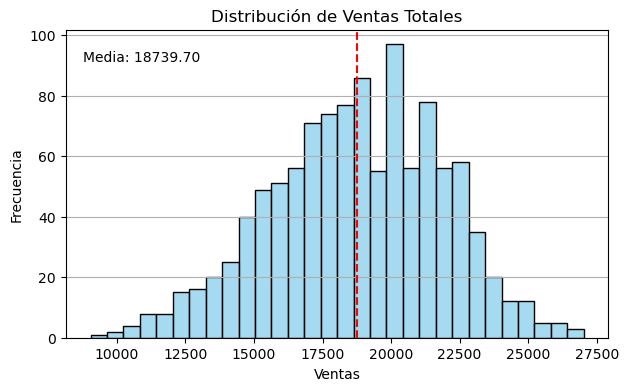

In [60]:
plt.figure(figsize=(7,4))
sns.histplot(data, bins=30, color="skyblue")
plt.title("Distribución de Ventas Totales")
plt.xlabel("Ventas")
plt.ylabel("Frecuencia")
plt.grid(axis = 'y')

media = np.mean(data)
plt.axvline(media, color='red', linestyle='--')
plt.figtext(0.15, 0.8, f'Media: {media:.2f}', fontsize=10, color='black')
        
plt.show()

##### Función de distribución acumulada empírica (ECDF) de 2021, 2022 y 2023

En esta sección se pueden visualizar las ECDF de cada año para contrastar pequeñas diferencias obtenidas de los datos de venta.

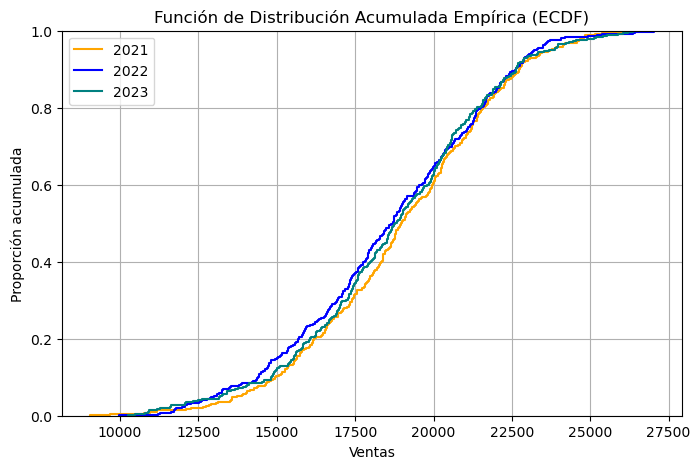

In [42]:
plt.figure(figsize=(8,5))

# ECDF para cada año
sns.ecdfplot(data_2021["Ventas"], label="2021", color="orange")
sns.ecdfplot(data_2022["Ventas"], label="2022", color="blue")
sns.ecdfplot(data_2023["Ventas"], label="2023", color="teal")

plt.title("Función de Distribución Acumulada Empírica (ECDF)")
plt.xlabel("Ventas")
plt.ylabel("Proporción acumulada")
plt.legend()
plt.grid(True)
plt.show()

#### Año 2021

In [22]:
# Se convierte la columna 'Fecha' a datetime
df_ventas["Fecha"] = pd.to_datetime(df_ventas["Fecha"], dayfirst=True)

# Se agrega la columna "Año"
df_ventas["Año"] = df_ventas["Fecha"].dt.year

# Filtrar solo 2021
data_2021 = df_ventas[df_ventas["Año"] == 2021]

print(data_2021)

         Fecha        Ventas   Año
0   2021-01-01  10966.487197  2021
1   2021-01-02  13123.414519  2021
2   2021-01-03  15609.084990  2021
3   2021-01-04  15806.327712  2021
4   2021-01-05  16753.026490  2021
..         ...           ...   ...
360 2021-12-27  24197.110655  2021
361 2021-12-28  20907.873537  2021
362 2021-12-29  19915.711921  2021
363 2021-12-30  18729.795998  2021
364 2021-12-31  17565.384610  2021

[365 rows x 3 columns]


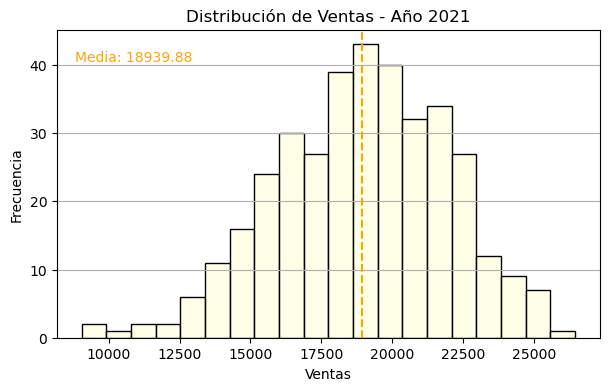

In [59]:
plt.figure(figsize=(7,4))
sns.histplot(data_2021["Ventas"], bins=20, color="lightyellow")
plt.title("Distribución de Ventas - Año 2021")
plt.xlabel("Ventas")
plt.ylabel("Frecuencia")
plt.grid(axis = 'y')

media_2021 = np.mean(data_2021["Ventas"])
plt.axvline(media_2021, color='orange', linestyle='--')
plt.figtext(0.15, 0.8, f'Media: {media_2021:.2f}', fontsize=10, color='orange')

plt.show()

##### Empirical Cumulative Distribution Function (ECDF)

Muestra la probabilidad de que una variable sea menor o igual que un valor dado.

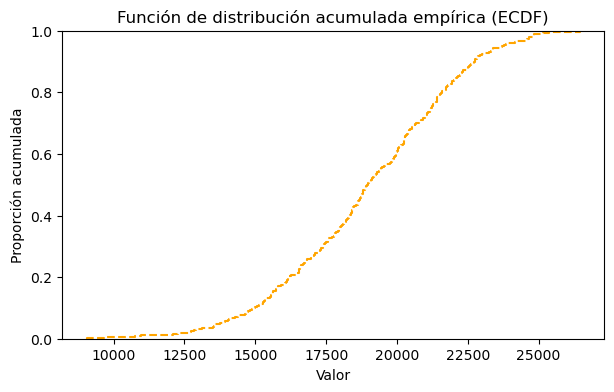

In [43]:
# ECDF
plt.figure(figsize=(7,4))
sns.ecdfplot(data_2021["Ventas"], color="orange", ls='--')

plt.title("Función de distribución acumulada empírica (ECDF)")
plt.xlabel("Valor")
plt.ylabel("Proporción acumulada")
plt.show()

##### Kernel Density Estimate (KDE)

Es una estimación suavizada de la función de densidad de probabilidad o Probability Density Function (PDF)
a partir de datos muestrales.

Indica qué tan “concentrada” está la probabilidad alrededor de un valor.

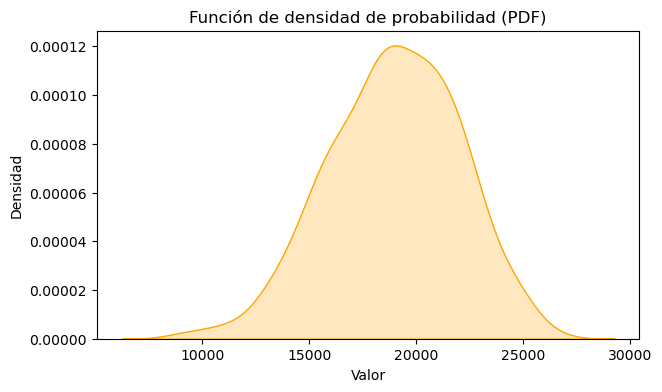

In [57]:
# KDE
plt.figure(figsize=(7,4))
sns.kdeplot(data_2021["Ventas"], fill=True, color="orange")
plt.title("Función de densidad de probabilidad (PDF)")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.show()

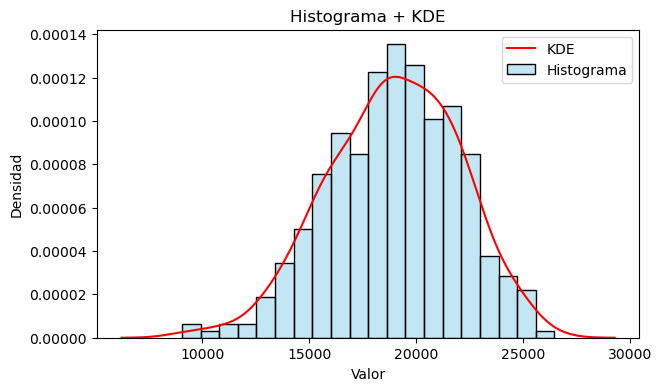

In [26]:
# Histograma + KDE
plt.figure(figsize=(7,4))

# Parámetro stat='density': dibuja una densidad de probabilidad. (El área bajo el histograma da 1)
sns.histplot(data_2021["Ventas"], bins=20, stat="density", color="skyblue", alpha=0.5, label="Histograma")
sns.kdeplot(data_2021["Ventas"], color="red", label="KDE")

plt.title("Histograma + KDE")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.legend()
plt.show()

#### Año 2022

In [27]:
# Se convierte la columna 'Fecha' a datetime
df_ventas["Fecha"] = pd.to_datetime(df_ventas["Fecha"], dayfirst=True)

# Se agrega la columna "Año"
df_ventas["Año"] = df_ventas["Fecha"].dt.year

# Filtrar solo 2021
data_2022 = df_ventas[df_ventas["Año"] == 2022]

print(data_2022)

         Fecha        Ventas   Año
365 2022-01-01  13526.286433  2022
366 2022-01-02  13520.919082  2022
367 2022-01-03  14799.562062  2022
368 2022-01-04  17761.348470  2022
369 2022-01-05  15601.486068  2022
..         ...           ...   ...
725 2022-12-27  20265.613684  2022
726 2022-12-28  18302.394432  2022
727 2022-12-29  18695.667714  2022
728 2022-12-30  15463.853926  2022
729 2022-12-31  11268.597482  2022

[365 rows x 3 columns]


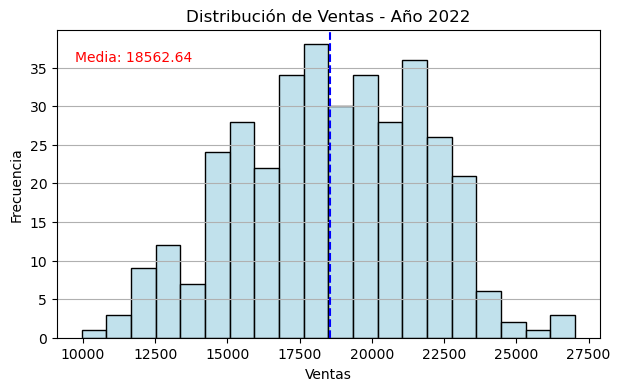

In [48]:
plt.figure(figsize=(7,4))
sns.histplot(data_2022["Ventas"], bins=20, color="lightblue")
plt.title("Distribución de Ventas - Año 2022")
plt.xlabel("Ventas")
plt.ylabel("Frecuencia")
plt.grid(axis = 'y')

media_2022 = np.mean(data_2022["Ventas"])
plt.axvline(media_2022, color='blue', linestyle='--')
plt.figtext(0.15, 0.8, f'Media: {media_2022:.2f}', fontsize=10, color='red')

plt.show()

##### Empirical Cumulative Distribution Function (ECDF)

Muestra la probabilidad de que una variable sea menor o igual que un valor dado.

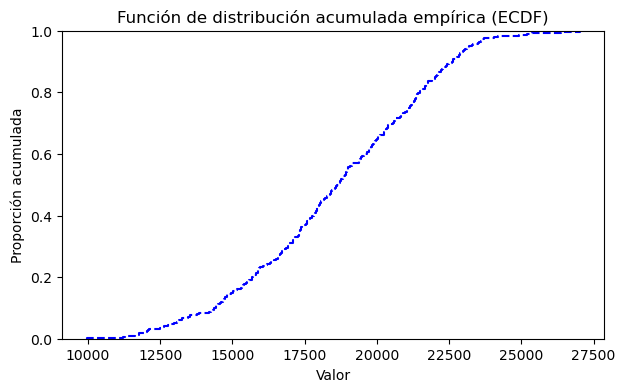

In [45]:
# ECDF
plt.figure(figsize=(7,4))
sns.ecdfplot(data_2022["Ventas"], color="blue", ls='--')

plt.title("Función de distribución acumulada empírica (ECDF)")
plt.xlabel("Valor")
plt.ylabel("Proporción acumulada")
plt.show()

##### Kernel Density Estimate (KDE)

Es una estimación suavizada de la función de densidad de probabilidad o Probability Density Function (PDF)
a partir de datos muestrales.

Indica qué tan “concentrada” está la probabilidad alrededor de un valor.

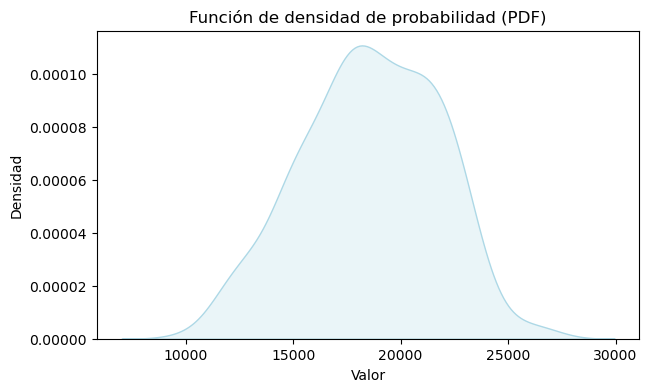

In [49]:
# KDE
plt.figure(figsize=(7,4))
sns.kdeplot(data_2022["Ventas"], fill=True, color="lightblue")
plt.title("Función de densidad de probabilidad (PDF)")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.show()

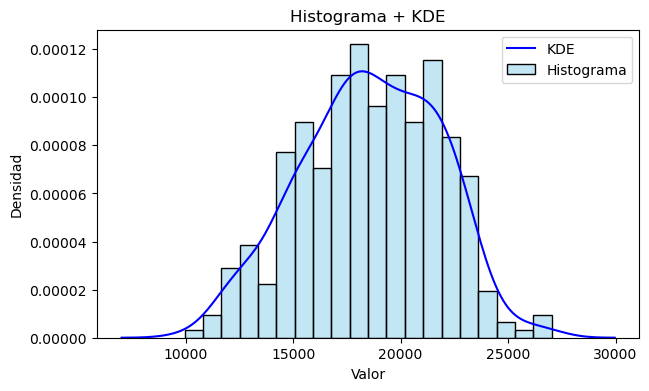

In [50]:
# Histograma + KDE
plt.figure(figsize=(7,4))

# Parámetro stat='density': dibuja una densidad de probabilidad. (El área bajo el histograma da 1)
sns.histplot(data_2022["Ventas"], bins=20, stat="density", color="skyblue", alpha=0.5, label="Histograma")
sns.kdeplot(data_2022["Ventas"], color="blue", label="KDE")

plt.title("Histograma + KDE")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.legend()
plt.show()

#### Año 2023

In [32]:
# Se convierte la columna 'Fecha' a datetime
df_ventas["Fecha"] = pd.to_datetime(df_ventas["Fecha"], dayfirst=True)

# Se agrega la columna "Año"
df_ventas["Año"] = df_ventas["Fecha"].dt.year

# Filtrar solo 2021
data_2023 = df_ventas[df_ventas["Año"] == 2023]

print(data_2023)

          Fecha        Ventas   Año
730  2023-01-01  10887.496306  2023
731  2023-01-02  10246.595473  2023
732  2023-01-03  15633.149174  2023
733  2023-01-04  18726.905489  2023
734  2023-01-05  18973.628284  2023
...         ...           ...   ...
1090 2023-12-27  20053.646674  2023
1091 2023-12-28  15847.392281  2023
1092 2023-12-29  17417.464106  2023
1093 2023-12-30  16413.461658  2023
1094 2023-12-31  15561.972612  2023

[365 rows x 3 columns]


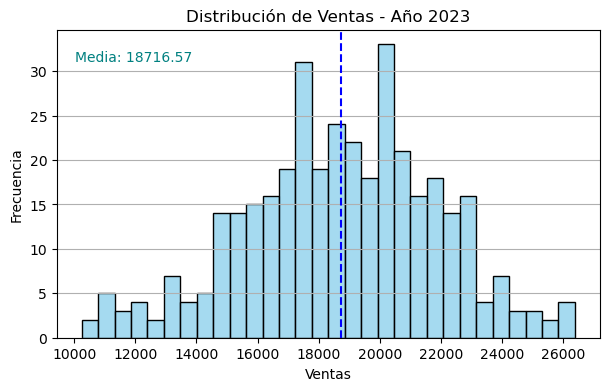

In [54]:
plt.figure(figsize=(7,4))
sns.histplot(data_2023["Ventas"], bins=30, color="skyblue")
plt.title("Distribución de Ventas - Año 2023")
plt.xlabel("Ventas")
plt.ylabel("Frecuencia")
plt.grid(axis = 'y')

media_2023 = np.mean(data_2023["Ventas"])
plt.axvline(media_2023, color='blue', linestyle='--')
plt.figtext(0.15, 0.8, f'Media: {media_2023:.2f}', fontsize=10, color='teal')

plt.show()

##### Empirical Cumulative Distribution Function (ECDF)

Muestra la probabilidad de que una variable sea menor o igual que un valor dado.

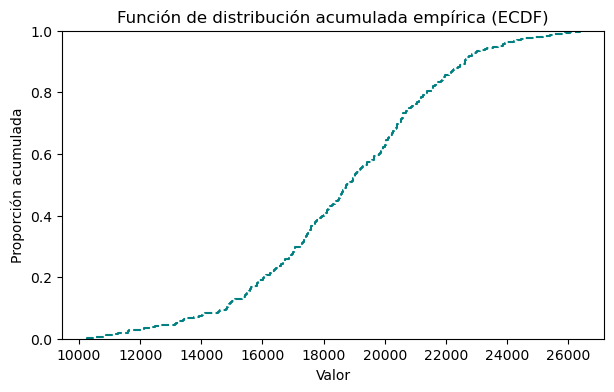

In [44]:
# ECDF
plt.figure(figsize=(7,4))
sns.ecdfplot(data_2023["Ventas"], color="teal", ls='--')

plt.title("Función de distribución acumulada empírica (ECDF)")
plt.xlabel("Valor")
plt.ylabel("Proporción acumulada")
plt.show()

##### Kernel Density Estimate (KDE)

Es una estimación suavizada de la función de densidad de probabilidad o Probability Density Function (PDF)
a partir de datos muestrales.

Indica qué tan “concentrada” está la probabilidad alrededor de un valor.

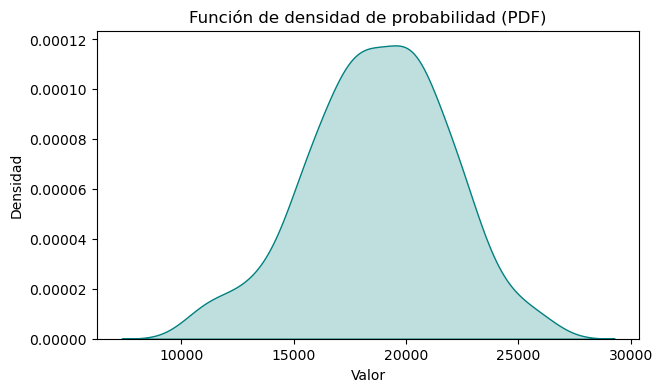

In [55]:
# KDE
plt.figure(figsize=(7,4))
sns.kdeplot(data_2023["Ventas"], fill=True, color="teal")
plt.title("Función de densidad de probabilidad (PDF)")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.show()

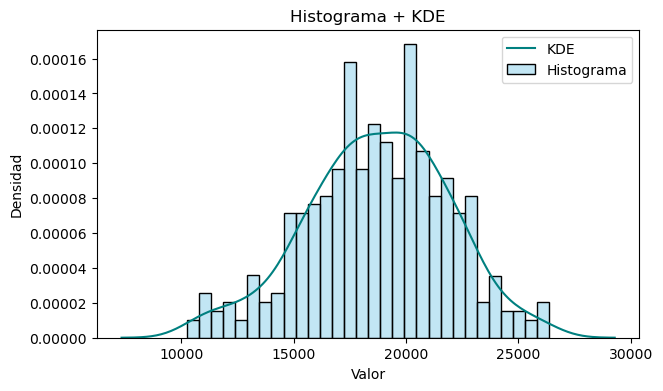

In [56]:
# Histograma + KDE
plt.figure(figsize=(7,4))

# Parámetro stat='density': dibuja una densidad de probabilidad. (El área bajo el histograma da 1)
sns.histplot(data_2023["Ventas"], bins=30, stat="density", color="skyblue", alpha=0.5, label="Histograma")
sns.kdeplot(data_2023["Ventas"], color="teal", label="KDE")

plt.title("Histograma + KDE")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.legend()
plt.show()

El *Histograma + KDE* muestra una KDE que se ajusta casi perfecto al histograma, pero parece omitir dos picos de ventas presentados dentro del período. 

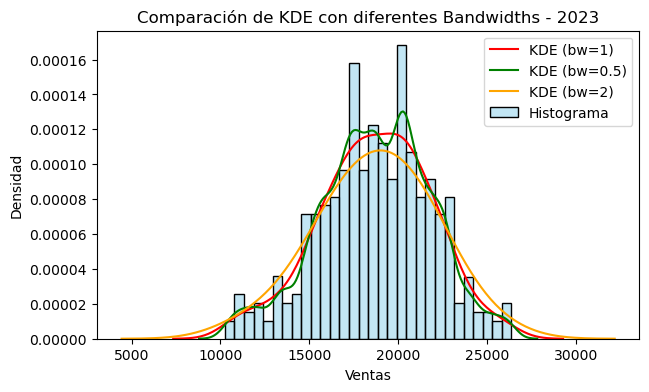

In [37]:
plt.figure(figsize=(7,4))
sns.histplot(data_2023["Ventas"], bins=30, stat="density", color="skyblue", alpha=0.5, label="Histograma")

# KDE con distintos niveles de suavizado
sns.kdeplot(data_2023["Ventas"], color="red", label="KDE (bw=1)", bw_adjust=1)
sns.kdeplot(data_2023["Ventas"], color="green", label="KDE (bw=0.5)", bw_adjust=0.5)
sns.kdeplot(data_2023["Ventas"], color="orange", label="KDE (bw=2)", bw_adjust=2)

plt.title("Comparación de KDE con diferentes Bandwidths - 2023")
plt.xlabel("Ventas")
plt.ylabel("Densidad")
plt.legend()
plt.show()

Al analizar la distribución de las ventas de 2023 mediante la estimación de densidad por kernel (KDE), se observa que la forma de la curva depende del parámetro de suavizado (bandwidth).

- Con un valor estándar (bw=1), aparecen dos picos principales, lo que sugiere una posible bimodalidad en los datos.

- Al reducir el bandwidth (bw=0.5), la curva se ajusta más fielmente a las oscilaciones del histograma, acentuando los picos y mostrando mayor detalle local.

- Al aumentar el bandwidth (bw=2), la curva se suaviza y los dos picos tienden a unificarse en una distribución más cercana a una forma unimodal.

Esto indica que los datos de 2023 presentan variabilidad interna: podrían reflejar la existencia de dos regímenes de ventas diferentes (por ejemplo, temporada alta vs. temporada baja, o semanas con promociones frente a semanas regulares).